In [1]:
# Import Dependencies
import seaborn as sns
import pandas as pd
import re
import numpy as np

In [2]:
# Read csv into pandas dataframe
wine_df = pd.read_csv("winemag-data.csv").drop(["Unnamed: 0"], axis=1)
wine_df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


# Preprocessing & Data Cleanup

In [3]:
# Return number of rows and columns for raw dataframe.
wine_df.shape

(129971, 13)

In [4]:
# Print summary info for all columns in dataframe.
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


## Add year column to df

In [5]:
# Create list of titles to prepare for year extraction.
titles_list = list(wine_df["title"].values)
titles_list

['Nicosia 2013 Vulkà Bianco  (Etna)',
 'Quinta dos Avidagos 2011 Avidagos Red (Douro)',
 'Rainstorm 2013 Pinot Gris (Willamette Valley)',
 'St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore)',
 "Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley)",
 'Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra)',
 'Terre di Giurfo 2013 Belsito Frappato (Vittoria)',
 'Trimbach 2012 Gewurztraminer (Alsace)',
 'Heinz Eifel 2013 Shine Gewürztraminer (Rheinhessen)',
 'Jean-Baptiste Adam 2012 Les Natures Pinot Gris (Alsace)',
 'Kirkland Signature 2011 Mountain Cuvée Cabernet Sauvignon (Napa Valley)',
 'Leon Beyer 2012 Gewurztraminer (Alsace)',
 'Louis M. Martini 2012 Cabernet Sauvignon (Alexander Valley)',
 'Masseria Setteporte 2012 Rosso  (Etna)',
 'Mirassou 2012 Chardonnay (Central Coast)',
 'Richard Böcking 2013 Devon Riesling (Mosel)',
 'Felix Lavaque 2010 Felix Malbec (Cafayate)',
 'Gaucho Andino 2011 Winemaker Selection Malbec (Mendoza)',
 'Prad

In [6]:
# loop through titles and store years from 21st century to list.
years = []
for i, title in enumerate(titles_list):
    try:
        year = re.search(r"\b(20)\d{2}\b", title).group(0)
        years.append(year)
    except:
        years.append(np.NaN)
print(years)

['2013', '2011', '2013', '2013', '2012', '2011', '2013', '2012', '2013', '2012', '2011', '2012', '2012', '2012', '2012', '2013', '2010', '2011', '2010', '2012', '2012', '2013', '2007', '2011', '2009', '2011', '2013', '2013', '2011', '2010', '2012', '2010', '2011', '2010', '2011', '2010', '2011', '2010', '2011', '2011', '2011', '2009', '2012', '2011', '2011', '2010', '2011', '2011', '2011', '2011', '2008', '2008', '2010', '2011', '2010', '2010', '2010', '2011', '2011', '2014', '2013', '2015', '2014', nan, '2015', '2015', '2015', '2013', '2014', nan, '2014', '2013', '2013', '2013', '2012', '2013', '2015', '2016', '2015', '2014', '2014', '2014', '2016', '2016', '2014', '2015', '2016', '2014', '2014', '2015', '2014', '2015', '2013', '2015', '2014', '2015', '2015', '2015', '2010', '2013', '2015', '2014', '2014', '2015', '2014', '2015', '2014', '2015', '2014', '2014', '2015', '2013', '2014', '2015', '2012', '2013', '2013', '2014', '2013', '2004', '2003', '2007', '2007', '2006', '2006', '2003

In [7]:
# Add extracted year column to dataframe.
wine_df["year"] = years
wine_df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


In [8]:
# check stats for year column.
wine_df['year'].describe()

count     123626
unique        18
top         2013
freq       15875
Name: year, dtype: object

In [9]:
# Print summary info for all columns in revised dataframe.
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  year                   123626 non-null  object 
dtypes: float64(1), int64(1), object(12)


## Add type column to df for red and white categories

In [10]:
# Create list of descriptions to examine for adding type feature.
description_list = list(wine_df["description"].values)
description_list

["Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",
 "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.",
 'Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.',
 'Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.',
 "Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy count

In [11]:
# Testing.
wine_df['variety'].str.contains('red').value_counts()

False    129906
True         64
Name: variety, dtype: int64

In [12]:
# Read in text file and convert to dictionary for red grape varieties.
red_dictionary = {}
file = open('Red dictionary.txt')
for line in file:
    key,value = line.split()
    red_dictionary[key] = value
    
print(red_dictionary)

{'Red': 'red', 'Red_Blend': 'red', 'Rosso': 'red', 'Rioja': 'red', 'Pink': 'red', 'Dark': 'red', 'Chocolate': 'red', 'Cherry': 'red', 'Berry': 'red', 'Berries': 'red', 'Blackberry': 'red', 'Plum': 'red', 'Abouriou': 'red', 'AcÄ±kara': 'red', 'Agiorgitiko': 'red', 'Aglianico': 'red', 'Aleatico': 'red', 'Alfrocheiro': 'red', 'Alicante_Bouschet': 'red', 'AragonÃªs': 'red', 'Aramon': 'red', 'Areni_Noir': 'red', 'Aspiran': 'red', 'BÄƒbeascÄƒ_NeagrÄƒ': 'red', 'BabiÄ‡': 'red', 'Baco_Noir': 'red', 'Baga': 'red', 'Barbarossa': 'red', 'Barbera': 'red', 'Bastardo': 'red', 'Berligou': 'red', 'Black_Muscat': 'red', 'Blauburger': 'red', 'Blauburgunder': 'red', 'Blauer_FrÃ¼hburgunder': 'red', 'Blauer_SpÃ¤tburgunder': 'red', 'Blauer_Wildbacher': 'red', 'BlaufrÃ¤nkisch': 'red', 'Bobal': 'red', 'Bonarda': 'red', 'Bordeaux-style_Red_Blend': 'red', 'Brachetto': 'red', 'Braquet': 'red', 'Breton': 'red', 'Brocol': 'red', 'Brunello': 'red', 'Burgund_Mare': 'red', 'Cabernet': 'red', 'Cabernet_Sauvignon-Carmen

In [13]:
# Replace underscores with spaces in dictionary keys.
corrected_red_dict = {k.replace('_', ' '): v for k, v in red_dictionary.items()}
corrected_red_dict

{'Red': 'red',
 'Red Blend': 'red',
 'Rosso': 'red',
 'Rioja': 'red',
 'Pink': 'red',
 'Dark': 'red',
 'Chocolate': 'red',
 'Cherry': 'red',
 'Berry': 'red',
 'Berries': 'red',
 'Blackberry': 'red',
 'Plum': 'red',
 'Abouriou': 'red',
 'AcÄ±kara': 'red',
 'Agiorgitiko': 'red',
 'Aglianico': 'red',
 'Aleatico': 'red',
 'Alfrocheiro': 'red',
 'Alicante Bouschet': 'red',
 'AragonÃªs': 'red',
 'Aramon': 'red',
 'Areni Noir': 'red',
 'Aspiran': 'red',
 'BÄƒbeascÄƒ NeagrÄƒ': 'red',
 'BabiÄ‡': 'red',
 'Baco Noir': 'red',
 'Baga': 'red',
 'Barbarossa': 'red',
 'Barbera': 'red',
 'Bastardo': 'red',
 'Berligou': 'red',
 'Black Muscat': 'red',
 'Blauburger': 'red',
 'Blauburgunder': 'red',
 'Blauer FrÃ¼hburgunder': 'red',
 'Blauer SpÃ¤tburgunder': 'red',
 'Blauer Wildbacher': 'red',
 'BlaufrÃ¤nkisch': 'red',
 'Bobal': 'red',
 'Bonarda': 'red',
 'Bordeaux-style Red Blend': 'red',
 'Brachetto': 'red',
 'Braquet': 'red',
 'Breton': 'red',
 'Brocol': 'red',
 'Brunello': 'red',
 'Burgund Mare': 'red',

In [14]:
# Read in text file and convert to dictionary for white grape varieties.
white_dictionary = {}
file = open('White dictionary.txt')
for line in file:
    key,value = line.split()
    white_dictionary[key] = value
    
print(white_dictionary)

{'White': 'white', 'White_Blend': 'white', 'Bianco': 'white', 'Blanco': 'white', 'Blanc': 'white', 'Crisp': 'white', 'Tropical': 'white', 'Pear': 'white', 'Melon': 'white', 'Peach': 'white', 'Bubbly': 'white', 'Agrippiotis': 'white', 'AirÃ©n': 'white', 'Alarije': 'white', 'Albalonga': 'white', 'Albana': 'white', 'AlbariÃ±o': 'white', 'Albillo': 'white', 'AligotÃ©': 'white', 'Alsace_white_blend': 'white', 'Altesse': 'white', 'Alvarinho': 'white', 'Amigne': 'white', 'Ansonica': 'white', 'AntÃ£o_Vaz': 'white', 'Arinto': 'white', 'Arneis': 'white', 'Arrufiac': 'white', 'Assyrtiko': 'white', 'Auxerrois': 'white', 'Avesso': 'white', 'Azal': 'white', 'Bacchus': 'white', 'Baco_Blanc': 'white', 'Baiyu': 'white', 'Baroque': 'white', 'Bergeron': 'white', 'Bical': 'white', 'Boal': 'white', 'Bombino_Bianco': 'white', 'Bordeaux-style_White_Blend': 'white', 'Borrado_das_Moscas': 'white', 'Bourboulenc': 'white', 'Bouvier': 'white', 'Carignan_Blanc': 'white', 'Carricante': 'white', 'Catarratto': 'white

In [15]:
# Replace underscores with spaces in dictionary keys.
corrected_white_dict = {k.replace('_', ' '): v for k, v in white_dictionary.items()}
corrected_white_dict

{'White': 'white',
 'White Blend': 'white',
 'Bianco': 'white',
 'Blanco': 'white',
 'Blanc': 'white',
 'Crisp': 'white',
 'Tropical': 'white',
 'Pear': 'white',
 'Melon': 'white',
 'Peach': 'white',
 'Bubbly': 'white',
 'Agrippiotis': 'white',
 'AirÃ©n': 'white',
 'Alarije': 'white',
 'Albalonga': 'white',
 'Albana': 'white',
 'AlbariÃ±o': 'white',
 'Albillo': 'white',
 'AligotÃ©': 'white',
 'Alsace white blend': 'white',
 'Altesse': 'white',
 'Alvarinho': 'white',
 'Amigne': 'white',
 'Ansonica': 'white',
 'AntÃ£o Vaz': 'white',
 'Arinto': 'white',
 'Arneis': 'white',
 'Arrufiac': 'white',
 'Assyrtiko': 'white',
 'Auxerrois': 'white',
 'Avesso': 'white',
 'Azal': 'white',
 'Bacchus': 'white',
 'Baco Blanc': 'white',
 'Baiyu': 'white',
 'Baroque': 'white',
 'Bergeron': 'white',
 'Bical': 'white',
 'Boal': 'white',
 'Bombino Bianco': 'white',
 'Bordeaux-style White Blend': 'white',
 'Borrado das Moscas': 'white',
 'Bourboulenc': 'white',
 'Bouvier': 'white',
 'Carignan Blanc': 'white',

In [16]:
# Create function to merge two dictionaries.
def merge_dicts(x, y):
    z = x.copy()
    z.update(y)
    return z

# Merge red and white dictionaries.
merged_type_dict = merge_dicts(corrected_red_dict, corrected_white_dict)
merged_type_dict

{'Red': 'red',
 'Red Blend': 'red',
 'Rosso': 'red',
 'Rioja': 'red',
 'Pink': 'red',
 'Dark': 'red',
 'Chocolate': 'red',
 'Cherry': 'red',
 'Berry': 'red',
 'Berries': 'red',
 'Blackberry': 'red',
 'Plum': 'red',
 'Abouriou': 'red',
 'AcÄ±kara': 'red',
 'Agiorgitiko': 'red',
 'Aglianico': 'red',
 'Aleatico': 'red',
 'Alfrocheiro': 'red',
 'Alicante Bouschet': 'red',
 'AragonÃªs': 'red',
 'Aramon': 'red',
 'Areni Noir': 'red',
 'Aspiran': 'red',
 'BÄƒbeascÄƒ NeagrÄƒ': 'red',
 'BabiÄ‡': 'red',
 'Baco Noir': 'red',
 'Baga': 'red',
 'Barbarossa': 'red',
 'Barbera': 'red',
 'Bastardo': 'red',
 'Berligou': 'red',
 'Black Muscat': 'red',
 'Blauburger': 'red',
 'Blauburgunder': 'red',
 'Blauer FrÃ¼hburgunder': 'red',
 'Blauer SpÃ¤tburgunder': 'red',
 'Blauer Wildbacher': 'red',
 'BlaufrÃ¤nkisch': 'red',
 'Bobal': 'red',
 'Bonarda': 'red',
 'Bordeaux-style Red Blend': 'red',
 'Brachetto': 'red',
 'Braquet': 'red',
 'Breton': 'red',
 'Brocol': 'red',
 'Brunello': 'red',
 'Burgund Mare': 'red',

In [17]:
# Create function to check features (variety, title, and description) against type dictionary and assign red/white feature.
type = merged_type_dict

def fill_type(x):
    for key in type:
        if key.lower() in x.lower():
            return type[key]
    return np.NaN

# STEP 1 - Call function and create new column for red and white wine types.
wine_df["type"] = wine_df["variety"].astype(str).map(lambda x: fill_type(x))

wine_df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,type
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,white
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,red
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,white
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,white
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013,white
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004,red
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013,white
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012,white


In [18]:
# Print summary info for all columns in revised dataframe.
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  year                   123626 non-null  object 
 14  type                   120567 non-nu

In [19]:
# Check counts for new type column.
wine_df['type'].value_counts()

red      78687
white    41880
Name: type, dtype: int64

In [20]:
# Locate rows that contain null values for type.
null_type = wine_df['type'].isna()
wine_df.loc[null_type,:]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,type
19,US,"Red fruit aromas pervade on the nose, with cig...",NaN,87,32.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,Quiévremont 2012 Meritage (Virginia),Meritage,Quiévremont,2012,NaN
80,Chile,Caramelized oak and vanilla aromas are front a...,Special Release Reserva,86,12.0,Rapel Valley,NaN,NaN,Michael Schachner,@wineschach,Aresti 2014 Special Release Reserva Carmenère ...,Carmenère,Aresti,2014,NaN
81,Spain,"Bland, mature aromas of white fruits are on th...",NaN,86,16.0,Galicia,Rías Baixas,NaN,Michael Schachner,@wineschach,Spyro 2014 Albariño (Rías Baixas),Albariño,Spyro,2014,NaN
83,Australia,"Pale copper in hue, this wine exudes passion f...",Jester Sangiovese,86,20.0,South Australia,McLaren Vale,NaN,Joe Czerwinski,@JoeCz,Mitolo 2016 Jester Sangiovese Rosé (McLaren Vale),Rosé,Mitolo,2016,NaN
86,US,"Vibrant aromas of ripe pear, white flowers and...",NaN,86,20.0,Washington,Ancient Lakes,Columbia Valley,Sean P. Sullivan,@wawinereport,Palencia 2016 Albariño (Ancient Lakes),Albariño,Palencia,2016,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129838,Austria,The aromas are of new wood and spice. But the ...,Vom Leithagebirge,86,30.0,Burgenland,NaN,NaN,Roger Voss,@vossroger,Hans Moser 2006 Vom Leithagebirge Blaufränkisc...,Blaufränkisch,Hans Moser,2006,NaN
129845,Austria,"Höpler's entry-level Grüner is fresh, green, s...",NaN,86,13.0,Burgenland,NaN,NaN,Roger Voss,@vossroger,Höpler 2007 Grüner Veltliner (Burgenland),Grüner Veltliner,Höpler,2007,NaN
129856,Spain,Lime and grapefruit aromas are a touch pithy a...,Ethereo,90,15.0,Galicia,Rías Baixas,NaN,Michael Schachner,@wineschach,Bodegas Eidosela 2015 Ethereo Albariño (Rías B...,Albariño,Bodegas Eidosela,2015,NaN
129934,Austria,"You can feel the unctuous, oily richness as so...",Alte Reben,91,54.0,Kamptal,NaN,NaN,Roger Voss,@vossroger,Bründlmayer 2007 Alte Reben Grüner Veltliner (...,Grüner Veltliner,Bründlmayer,2007,NaN


In [21]:
# STEP 2 - Try to replace null values in type column with dictionary matches in title.
wine_df['type'].fillna(wine_df["title"].map(lambda x: fill_type(x)), inplace=True)
wine_df.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,type
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,white
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,red
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,white
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,white
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,red
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011,red
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013,red
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,2012,white
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,2013,white
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012,white


In [22]:
# Check counts again for type column.
wine_df['type'].value_counts()

red      79624
white    42069
Name: type, dtype: int64

In [23]:
# Locate rows that contain null values for type.
null_type = wine_df['type'].isna()
wine_df.loc[null_type,:]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,type
19,US,"Red fruit aromas pervade on the nose, with cig...",NaN,87,32.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,Quiévremont 2012 Meritage (Virginia),Meritage,Quiévremont,2012,NaN
80,Chile,Caramelized oak and vanilla aromas are front a...,Special Release Reserva,86,12.0,Rapel Valley,NaN,NaN,Michael Schachner,@wineschach,Aresti 2014 Special Release Reserva Carmenère ...,Carmenère,Aresti,2014,NaN
81,Spain,"Bland, mature aromas of white fruits are on th...",NaN,86,16.0,Galicia,Rías Baixas,NaN,Michael Schachner,@wineschach,Spyro 2014 Albariño (Rías Baixas),Albariño,Spyro,2014,NaN
86,US,"Vibrant aromas of ripe pear, white flowers and...",NaN,86,20.0,Washington,Ancient Lakes,Columbia Valley,Sean P. Sullivan,@wawinereport,Palencia 2016 Albariño (Ancient Lakes),Albariño,Palencia,2016,NaN
89,Italy,"Made primarily from Sangiovese, with some Malv...",NaN,88,19.0,Tuscany,Toscana,NaN,Kerin O’Keefe,@kerinokeefe,Fattoria Sardi 2015 Rosato (Toscana),Rosato,Fattoria Sardi,2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129838,Austria,The aromas are of new wood and spice. But the ...,Vom Leithagebirge,86,30.0,Burgenland,NaN,NaN,Roger Voss,@vossroger,Hans Moser 2006 Vom Leithagebirge Blaufränkisc...,Blaufränkisch,Hans Moser,2006,NaN
129845,Austria,"Höpler's entry-level Grüner is fresh, green, s...",NaN,86,13.0,Burgenland,NaN,NaN,Roger Voss,@vossroger,Höpler 2007 Grüner Veltliner (Burgenland),Grüner Veltliner,Höpler,2007,NaN
129856,Spain,Lime and grapefruit aromas are a touch pithy a...,Ethereo,90,15.0,Galicia,Rías Baixas,NaN,Michael Schachner,@wineschach,Bodegas Eidosela 2015 Ethereo Albariño (Rías B...,Albariño,Bodegas Eidosela,2015,NaN
129934,Austria,"You can feel the unctuous, oily richness as so...",Alte Reben,91,54.0,Kamptal,NaN,NaN,Roger Voss,@vossroger,Bründlmayer 2007 Alte Reben Grüner Veltliner (...,Grüner Veltliner,Bründlmayer,2007,NaN


In [24]:
# STEP 3 - Try to replace null values in description column with dictionary matches to description.
wine_df['type'].fillna(wine_df["description"].map(lambda x: fill_type(x)), inplace=True)
wine_df.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,type
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,white
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,red
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,white
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,white
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,red
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011,red
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013,red
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,2012,white
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,2013,white
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012,white


In [25]:
# Check counts again for type column.
wine_df['type'].value_counts()

red      85208
white    43986
Name: type, dtype: int64

In [26]:
# Locate rows that contain null values for type.
null_type = wine_df['type'].isna()
wine_df.loc[null_type,:]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,type
269,Austria,"Smooth and ripe, this is a rich black-fruited ...",NaN,89,17.0,Leithaberg,NaN,NaN,Roger Voss,@vossroger,Mariell 2009 Blaufränkisch (Leithaberg),Blaufränkisch,Mariell,2009,NaN
554,France,"Named after the Negrel family, owners of the e...",Mas Negrel Cadenet,93,40.0,Provence,Côtes de Provence Sainte-Victoire,NaN,Roger Voss,@vossroger,Mas de Cadenet 2015 Mas Negrel Cadenet Rosé (C...,Rosé,Mas de Cadenet,2015,NaN
584,Austria,"That herbal, yeasty tang of Grüner is on displ...",NaN,89,18.0,Kamptal,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Steininger 2016 Grüner Veltliner (Kamptal),Grüner Veltliner,Steininger,2016,NaN
728,Argentina,Initial aromas of lychee and jasmine are varie...,Reserva,85,17.0,Other,Salta,NaN,Michael Schachner,@wineschach,Terrazas de Los Andes 2015 Reserva Torrontés (...,Torrontés,Terrazas de Los Andes,2015,NaN
735,Argentina,"Oily, gritty aromas of almond skins set up a p...",Don David Reserve,85,17.0,Other,Calchaquí Valley,NaN,Michael Schachner,@wineschach,El Esteco 2015 Don David Reserve Torrontés (Ca...,Torrontés,El Esteco,2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129076,Hungary,"This off-dry, honeyed Tokaj wine has a penetra...",3 Puttonyos Aszú,87,20.0,Tokaji,NaN,NaN,Anna Lee C. Iijima,NaN,Château Hellha 2002 3 Puttonyos Aszú (Tokaji),Tokaji,Château Hellha,2002,NaN
129081,Italy,"This wine opens with forest fruit, chopped her...",Agoghè,87,18.0,Tuscany,Toscana,NaN,NaN,NaN,Donna Olimpia 1898 2011 Agoghè Rosato (Toscana),Rosato,Donna Olimpia 1898,2011,NaN
129188,France,"Made in a more savory style, this shows hints ...",NaN,84,13.0,Rhône Valley,Côtes du Rhône,NaN,Joe Czerwinski,@JoeCz,Louis Bernard 2016 Rosé (Côtes du Rhône),Rosé,Louis Bernard,2016,NaN
129250,Austria,The nose does not want to give any more away t...,Reserve Frauenweingärten,93,27.0,Wachau,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Fischer 2014 Reserve Frauenweingärten Grüner V...,Grüner Veltliner,Fischer,2014,NaN


## Replace null values for region_1 and region_2

In [27]:
# Replace null values in region_1 column with province name.
wine_df['region_1'].fillna(wine_df['province'], inplace=True) 
wine_df.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,type
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,white
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,red
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,white
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,white
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,red
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011,red
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013,red
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,2012,white
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,Rheinhessen,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,2013,white
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012,white


In [28]:
# Replace null values in region_2 column with region_1 name.
wine_df['region_2'].fillna(wine_df['region_1'], inplace=True) 
wine_df.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,type
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,white
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Douro,Douro,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,red
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,white
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,white
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,red
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011,red
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013,red
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,Alsace,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,2012,white
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,Rheinhessen,Rheinhessen,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,2013,white
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Alsace,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012,white


In [29]:
# Print summary info for all columns in revised dataframe.
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               129908 non-null  object 
 7   region_2               129908 non-null  object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  year                   123626 non-null  object 
 14  type                   129194 non-nu

## Replace null values in taster_name to unknown

In [30]:
# Locate rows that contain null values for taster_name.
null_tasters = wine_df['taster_name'].isna()
wine_df.loc[null_tasters,:]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,type
31,Italy,Merlot and Nero d'Avola form the base for this...,Calanìca Nero d'Avola-Merlot,86,NaN,Sicily & Sardinia,Sicilia,Sicilia,NaN,NaN,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta,2010,red
32,Italy,"Part of the extended Calanìca series, this Gri...",Calanìca Grillo-Viognier,86,NaN,Sicily & Sardinia,Sicilia,Sicilia,NaN,NaN,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta,2011,white
33,US,"Rustic and dry, this has flavors of berries, c...",Puma Springs Vineyard,86,50.0,California,Dry Creek Valley,Sonoma,NaN,NaN,Envolve 2010 Puma Springs Vineyard Red (Dry Cr...,Red Blend,Envolve,2010,red
34,US,"This shows a tart, green gooseberry flavor tha...",NaN,86,20.0,California,Sonoma Valley,Sonoma,NaN,NaN,Envolve 2011 Sauvignon Blanc (Sonoma Valley),Sauvignon Blanc,Envolve,2011,white
37,Italy,This concentrated Cabernet offers aromas of cu...,Missoni,86,21.0,Sicily & Sardinia,Sicilia,Sicilia,NaN,NaN,Feudi del Pisciotto 2010 Missoni Cabernet Sauv...,Cabernet Sauvignon,Feudi del Pisciotto,2010,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129852,Italy,Here's an easy blend of Cabernet Sauvignon and...,NaN,86,10.0,Sicily & Sardinia,Sicilia,Sicilia,NaN,NaN,MandraRossa 2006 Cabernet Sauvignon-Shiraz (Si...,Cabernet Sauvignon-Shiraz,MandraRossa,2006,red
129914,US,Fritz has made tremendous progress with Cab ov...,NaN,91,35.0,California,Dry Creek Valley,Sonoma,NaN,NaN,Fritz 2005 Cabernet Sauvignon (Dry Creek Valley),Cabernet Sauvignon,Fritz,2005,red
129920,US,"Shows the clean, citrus acid juiciness and sil...",Fiddlestix Vineyard,91,48.0,California,Sta. Rita Hills,Central Coast,NaN,NaN,Pali 2006 Fiddlestix Vineyard Pinot Noir (Sta....,Pinot Noir,Pali,2006,red
129929,Italy,"This luminous sparkler has a sweet, fruit-forw...",NaN,91,38.0,Veneto,Prosecco Superiore di Cartizze,Prosecco Superiore di Cartizze,NaN,NaN,Col Vetoraz Spumanti NV Prosecco Superiore di...,Prosecco,Col Vetoraz Spumanti,NaN,white


In [31]:
# Replace null values in taster_name column with unknowns.
wine_df['taster_name'].fillna('unknown', inplace=True)
wine_df[30:40]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,type
30,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,NaN,Beaujolais,Beaujolais-Villages,Beaujolais-Villages,Roger Voss,@vossroger,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone,2012,red
31,Italy,Merlot and Nero d'Avola form the base for this...,Calanìca Nero d'Avola-Merlot,86,NaN,Sicily & Sardinia,Sicilia,Sicilia,unknown,NaN,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta,2010,red
32,Italy,"Part of the extended Calanìca series, this Gri...",Calanìca Grillo-Viognier,86,NaN,Sicily & Sardinia,Sicilia,Sicilia,unknown,NaN,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta,2011,white
33,US,"Rustic and dry, this has flavors of berries, c...",Puma Springs Vineyard,86,50.0,California,Dry Creek Valley,Sonoma,unknown,NaN,Envolve 2010 Puma Springs Vineyard Red (Dry Cr...,Red Blend,Envolve,2010,red
34,US,"This shows a tart, green gooseberry flavor tha...",NaN,86,20.0,California,Sonoma Valley,Sonoma,unknown,NaN,Envolve 2011 Sauvignon Blanc (Sonoma Valley),Sauvignon Blanc,Envolve,2011,white
35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,2010,red
36,Chile,"White flower, lychee and apple aromas carry th...",Estate,86,15.0,Colchagua Valley,Colchagua Valley,Colchagua Valley,Michael Schachner,@wineschach,Estampa 2011 Estate Viognier-Chardonnay (Colch...,Viognier-Chardonnay,Estampa,2011,white
37,Italy,This concentrated Cabernet offers aromas of cu...,Missoni,86,21.0,Sicily & Sardinia,Sicilia,Sicilia,unknown,NaN,Feudi del Pisciotto 2010 Missoni Cabernet Sauv...,Cabernet Sauvignon,Feudi del Pisciotto,2010,red
38,Italy,"Inky in color, this wine has plump aromas of r...",I Tratturi,86,11.0,Southern Italy,Puglia,Puglia,unknown,NaN,Feudi di San Marzano 2011 I Tratturi Primitivo...,Primitivo,Feudi di San Marzano,2011,red
39,Italy,"Part of the natural wine movement, this wine i...",Purato Made With Organic Grapes,86,12.0,Sicily & Sardinia,Sicilia,Sicilia,unknown,NaN,Feudo di Santa Tresa 2011 Purato Made With Org...,Nero d'Avola,Feudo di Santa Tresa,2011,red


In [32]:
# Print list of unique taste testers.
wine_df['taster_name'].value_counts()

unknown               26244
Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [33]:
# Print summary info for all columns in revised dataframe.
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               129908 non-null  object 
 7   region_2               129908 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  year                   123626 non-null  object 
 14  type                   129194 non-nu

## Create new wine_df - omit taster_twitter_handle, designation and description columns

In [34]:
# Create new dataframe with only the columns to keep. 
# (drop taster_twitter_handle, designation and description columns)

selected_columns = ['country', 'points', 'price', 'province','region_1', 'region_2',
                    'taster_name', 'title', 'variety', 'winery', 'year', 'type']

wine_df = wine_df[selected_columns]
wine_df

,country,points,price,province,region_1,region_2,taster_name,title,variety,winery,year,type
0,Italy,87,NaN,Sicily & Sardinia,Etna,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,white
1,Portugal,87,15.0,Douro,Douro,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,red
2,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,white
3,US,87,13.0,Michigan,Lake Michigan Shore,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,white
4,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,red
...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,90,28.0,Mosel,Mosel,Mosel,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013,white
129967,US,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004,red
129968,France,90,30.0,Alsace,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013,white
129969,France,90,32.0,Alsace,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012,white


In [35]:
# Create function to display info for null values in dataframe.
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [36]:
# Call function to display null values in dataframe.
missing_values_table(wine_df)

Your selected dataframe has 12 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
price,8996,6.9
year,6345,4.9
type,777,0.6
country,63,0.0
province,63,0.0
region_1,63,0.0
region_2,63,0.0
variety,1,0.0


In [37]:
# Drop all rows with null values and renumber index.
wine_df = wine_df.dropna().reset_index(drop=True)
wine_df

,country,points,price,province,region_1,region_2,taster_name,title,variety,winery,year,type
0,Portugal,87,15.0,Douro,Douro,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,red
1,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,white
2,US,87,13.0,Michigan,Lake Michigan Shore,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,white
3,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,red
4,Spain,87,15.0,Northern Spain,Navarra,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011,red
...,...,...,...,...,...,...,...,...,...,...,...,...
114461,Germany,90,28.0,Mosel,Mosel,Mosel,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013,white
114462,US,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004,red
114463,France,90,30.0,Alsace,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013,white
114464,France,90,32.0,Alsace,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012,white


In [38]:
# Save wine_df as CSV file.
wine_df.to_csv('clean_wine_data.csv', index=False)

# Analysis

In [39]:
# Print number of wines for each year, sorted from newer to older.
wine_df['year'].value_counts().sort_index(ascending=False)

2017       11
2016     3470
2015     9535
2014    14776
2013    15115
2012    14688
2011    11383
2010    11052
2009     9027
2008     6701
2007     6454
2006     5148
2005     3286
2004     1600
2003      495
2002      330
2001      666
2000      729
Name: year, dtype: int64

In [40]:
# Print counts of wines by country. 
wine_df['country'].value_counts()

US                        52308
France                    16096
Italy                     15838
Spain                      5918
Portugal                   4570
Chile                      4267
Argentina                  3676
Austria                    2590
Australia                  2162
Germany                    2097
New Zealand                1362
South Africa               1235
Israel                      483
Greece                      430
Canada                      245
Bulgaria                    141
Hungary                     132
Romania                     120
Uruguay                     108
Turkey                       90
Georgia                      81
Slovenia                     78
Croatia                      70
Mexico                       66
Moldova                      57
England                      55
Brazil                       38
Lebanon                      34
Morocco                      28
Peru                         16
Macedonia                    12
Serbia  

In [41]:
# Print ratings by number of times they appear in dataset and sort from highest to lowest. 
wine_df['points'].value_counts().sort_index(ascending=False)

100       17
99        26
98        65
97       196
96       463
95      1357
94      3343
93      5730
92      8546
91     10161
90     13712
89     10715
88     15167
87     14830
86     11030
85      8343
84      5643
83      2599
82      1585
81       598
80       340
Name: points, dtype: int64

In [42]:
# Check simple stats for dataset.
wine_df.describe()

,points,price
count,114466.000000,114466.000000
mean,88.469301,35.451531
std,3.033978,40.893344
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [43]:
# Print top 25 provinces that show up most often in dataset.
wine_df['province'].value_counts().head(25)

California            34774
Washington             8411
Oregon                 5168
Tuscany                4997
Bordeaux               3963
Northern Spain         3725
Mendoza Province       3168
Piedmont               3047
Burgundy               3035
New York               2549
Alsace                 1911
Northeastern Italy     1896
Veneto                 1754
Sicily & Sardinia      1531
Loire Valley           1524
Southwest France       1318
South Australia        1287
Douro                  1126
Southern Italy         1105
Provence               1067
Central Italy          1057
Mosel                  1013
Rhône Valley            995
Beaujolais              846
Alentejano              819
Name: province, dtype: int64

In [44]:
# Print counts of wines by year produced.
wine_df['year'].value_counts()

2013    15115
2014    14776
2012    14688
2011    11383
2010    11052
2015     9535
2009     9027
2008     6701
2007     6454
2006     5148
2016     3470
2005     3286
2004     1600
2000      729
2001      666
2003      495
2002      330
2017       11
Name: year, dtype: int64

In [45]:
# Print numbers of wines the tasters tested.
wine_df['taster_name'].value_counts()

unknown               22602
Roger Voss            18473
Michael Schachner     14050
Kerin O’Keefe          9538
Virginie Boone         9394
Paul Gregutt           9117
Matt Kettmann          6195
Sean P. Sullivan       4853
Joe Czerwinski         4718
Anna Lee C. Iijima     4269
Jim Gordon             4002
Anne Krebiehl MW       3083
Lauren Buzzeo          1670
Susan Kostrzewa        1009
Mike DeSimone           490
Jeff Jenssen            453
Alexander Peartree      392
Carrie Dykes            131
Fiona Adams              22
Christina Pickard         5
Name: taster_name, dtype: int64

In [46]:
# Show mean of rating and price broken down by country.
wine_df.groupby(['country']).mean()

,points,price
country,,
Argentina,86.764962,24.695049
Armenia,87.500000,14.500000
Australia,88.634598,35.311286
Austria,90.245946,30.949807
Bosnia and Herzegovina,86.500000,12.500000
Brazil,84.394737,23.631579
Bulgaria,87.936170,14.645390
Canada,89.440816,35.424490
Chile,86.546051,20.781814


In [47]:
# Show top 10 grape varieties.
wine_df['variety'].value_counts().nlargest(10)

Pinot Noir                  12479
Chardonnay                  10660
Cabernet Sauvignon           9092
Red Blend                    8190
Bordeaux-style Red Blend     5276
Riesling                     4927
Sauvignon Blanc              4742
Syrah                        4035
Rosé                         3094
Merlot                       2925
Name: variety, dtype: int64

In [48]:
# Show top 10 grape varieties by highest average rating, along with average price. 
variety_ratings = wine_df.groupby(['variety']).mean()
variety_ratings.sort_values('points', ascending=False).head(10)

,points,price
variety,,
Tinta del Pais,95.0,47.5
Gelber Traminer,95.0,35.0
Riesling-Chardonnay,94.0,40.0
Sercial,94.0,50.0
Garnacha-Cariñena,93.0,57.0
Bual,93.0,38.0
Blauburgunder,93.0,19.0
Roviello,93.0,28.0
Sirica,92.5,23.0


In [49]:
# Show top 10 countries by highest average rating, along with average price.
best_country_ratings = wine_df.groupby(['country']).mean()
best_country_ratings.sort_values('points', ascending=False).head(10)

,points,price
country,,
England,91.709091,52.400000
Austria,90.245946,30.949807
India,90.222222,13.333333
Germany,89.847401,42.370052
Canada,89.440816,35.424490
Hungary,89.219697,39.303030
China,89.000000,18.000000
France,88.744098,40.255281
Italy,88.726859,40.671171


In [50]:
# Show bottom 10 countries by lowest average rating, along with average price.
worst_country_ratings = wine_df.groupby(['country']).mean()
worst_country_ratings.sort_values('points', ascending=True).head(10)

,points,price
country,,
Peru,83.562500,18.062500
Ukraine,83.800000,8.800000
Brazil,84.394737,23.631579
Mexico,85.272727,27.363636
Romania,86.400000,15.241667
Bosnia and Herzegovina,86.500000,12.500000
Chile,86.546051,20.781814
Uruguay,86.712963,26.444444
Argentina,86.764962,24.695049


In [51]:
# Check data types.
wine_df.dtypes

country         object
points           int64
price          float64
province        object
region_1        object
region_2        object
taster_name     object
title           object
variety         object
winery          object
year            object
type            object
dtype: object

In [52]:
# Convert year data type to integer.
wine_df["year"] = wine_df["year"].astype(int)
wine_df.head()

,country,points,price,province,region_1,region_2,taster_name,title,variety,winery,year,type
0,Portugal,87,15.0,Douro,Douro,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,red
1,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,white
2,US,87,13.0,Michigan,Lake Michigan Shore,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,white
3,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,red
4,Spain,87,15.0,Northern Spain,Navarra,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011,red


In [53]:
# Double check data types again.
wine_df.dtypes

country         object
points           int64
price          float64
province        object
region_1        object
region_2        object
taster_name     object
title           object
variety         object
winery          object
year             int32
type            object
dtype: object

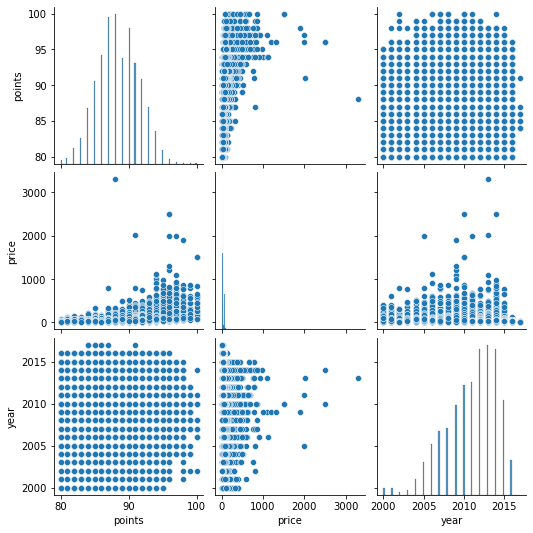

In [54]:
# Create pairplot to visualize relationships between price, points, and year features.
sns.pairplot(wine_df)

<AxesSubplot:xlabel='country', ylabel='points'>

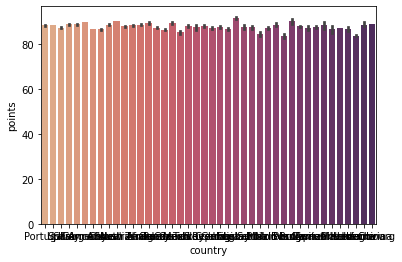

In [55]:
# Create bar plot of wine ratings by country.
sns.barplot(x='country', y='points', data=wine_df, palette='flare')